Stock price paths are simulated, assuming the price follows a geometric Brownian motion.
thus the price satisties the stochastic differential equation:
$dS_t = \mu S_t dt + \sigma S_t dW_t$
$dS_t$ is solved by Ito lemma and letting $Y_t = \log(S_t)$ which gives
$S_t = S_0 exp{\bigg((\mu - 0.5\sigma^2)t + \sigma W_t\bigg)}$

$W_t \sim \phi \sqrt{t}$ and $\phi \sim N(0,1)$

At each time step, we generate the stock price according to

$S_{t+dt} = S_t exp{\bigg((\mu - 0.5\sigma^2)dt} + \sigma \phi \sqrt{dt}\bigg)$.

where $S_{t+dt}$ denotes the stock price which is defined as

In [16]:
#from pandas.tseries.offsets import BDay
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Back-Scholes: Monte Carlo pricing 

Text(0, 0.5, '$S_t$')

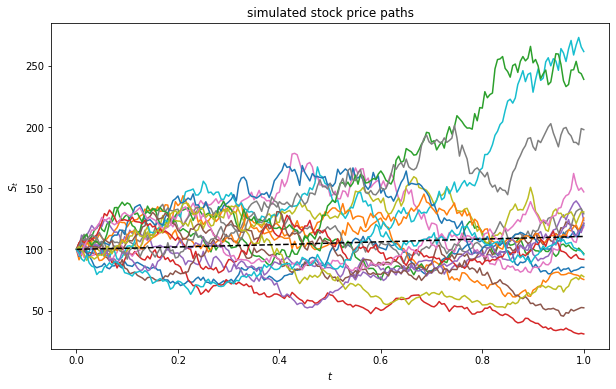

In [11]:

mu = 0.1 # mean
sigma = 0.45 # std
npaths = 20000 # number of paths
nsteps = 200 # number of time steps
npathsplot = 20 # number of paths ploted
T = 1 # time horizon
dt = T/nsteps # time step
s0 = 100 # Initial stock price

t = np.linspace(0, T, nsteps+1) # time grid

# compute the increments of the arithmetic brownian motion Z = log(S/s0)
dZ = (mu - 0.5*sigma**2)*dt +sigma*np.sqrt(dt)*np.random.normal(size=(npaths, nsteps))

# Accumulate the increments starting at 0
Z = np.concatenate((np.zeros((npaths,1)), np.cumsum(dZ, axis=1)), axis=1) 

# Transform to geometric Brownian motion
S = s0*np.exp(Z)

# Plot potential stock price paths
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for i in range(0, npaths, round(npaths/npathsplot)):
    ax.plot(t, S[i,:])
ax.plot(t, np.mean(S, axis=0), 'k--') # mean path
ax.set_title('simulated stock price paths')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$S_t$')

Let's fit a Lognormal distrobution to the simulated stock price and plot the distrbution of the price at maturity
and it a lognormal distribution

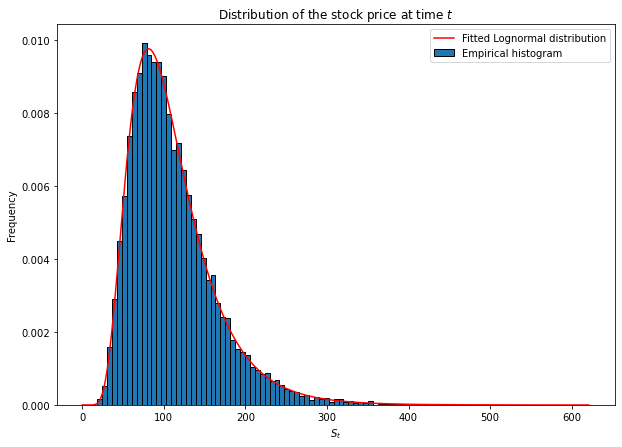

In [12]:
S_grid = range(int(S[:,-1].max())+1)
params = st.lognorm.fit(S[:,-1], scale=100)
pdf = st.lognorm.pdf(S_grid, *params)


fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111)
ax.hist(S[:,-1], 100, density=True, ec='k', label='Empirical histogram')
ax.set_title(r'Distribution of the stock price at time $t$')
ax.set_xlabel(r'$S_t$')
ax.set_ylabel('Frequency')


ax.plot(S_grid, pdf, 'r', label='Fitted Lognormal distribution')
ax.legend()

Finally using Monte carlo simulation we estimate the call and put option price
Option price is simply the discounted value of expected payoff under a risk-neutral measure.

Thus using MC and siimluating many price paths and taking the average of the discounted payoff for each path, we can price an option  

The risk-neutral drift is obtained by replacing $\mu = r - div =$ risk-free-rate - dividend-rate


In [13]:
# Market parametrs
T = 1 # maturity
Sp = 1 # spot price
K = 1.5 # strike price
r = 0.04# risk-free interest rate
div = 0.015 # dividend rate

# Model parameter
sigma = 0.35 # volatility

# Risk-neutural measure
muRN = r- div - (0.5*sigma**2) 

# MC parameters; npaths = nBlocks*nSample
nblocks = 20000 # number of blocks
nsample = 10000 # number of samples per block

# Initial arrays
Vcall_list = np.zeros(nblocks) # call array
Vput_list = np.zeros(nblocks) # put array

# Monte carlo simulation
for n in range(nblocks):
    Z = muRN*T + sigma*np.sqrt(T) * np.random.normal(size=(1, nsample))
    S = Sp * np.exp(Z)
    Vcall_list[n] = np.exp(-r*T)*np.mean(np.maximum(S - K, 0))
    Vput_list[n] = np.exp(-r*T)*np.mean(np.maximum(K - S, 0))
    

# Finally we take the average of the discounted payoff for each path as the value of call and put:
Vcall = np.mean(Vcall_list)
Vput = np.mean(Vput_list)


print('Estimated call option value is: ' + str(round(Vcall, 5)))
print('Estimated put option value is:  ' + str(round(Vput, 5)))

Estimated call option value is: 0.02907
Estimated put option value is:  0.48512
